In [58]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [59]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [61]:
x_train[6].shape

(28, 28)

In [62]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [63]:
x_train[6].shape

(28, 28, 1)

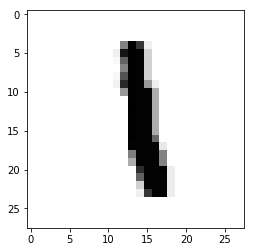

In [64]:
X=x_train[6]
X=X.reshape(28, 28)
plt.imshow(X,  cmap='Greys')

In [65]:
y_train[6]

1

In [66]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [67]:
y_train[6]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [68]:
## normalize
x_train = x_train/255
x_test = x_test/255


In [72]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta

In [73]:
##model
model = Sequential()

In [74]:
model = Sequential()

model.add(Conv2D(8, (6, 6), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (6, 6), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (6, 6), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (6, 6), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.07), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 8)         296       
_________________________________________________________________
activation_25 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
activation_26 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 32)          18464     
__________

In [75]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 74s 1ms/step - loss: 1.5008 - acc: 0.4385
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2733 - acc: 0.9279
Epoch 3/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1840 - acc: 0.9511
Epoch 4/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1532 - acc: 0.9599
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1335 - acc: 0.9641
Epoch 6/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1199 - acc: 0.9673
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1088 - acc: 0.9702
Epoch 8/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1003 - acc: 0.9726
Epoch 9/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0932 - acc: 0.9743
Epoch 10/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0870 - acc: 0.9755

In [76]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 595us/step


In [77]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.07600
測試資料的正確率: 0.9782


In [ ]:
add conx, layer, modify loss 